In [2]:
import duckdb
import pandas as pd

In [3]:
con = duckdb.connect("../github_stars.db")

In [24]:
query = """
  select *
  from github_stars.repo_stars_monthly as s
  """
df_monthly_stars = con.sql(query).df()
df_monthly_stars

,repo_id,repo_name,date_month,star_count,cumul_star_count
0,24470524,zingchart/ZingChart,2016-02-01,6,71.0
1,24470524,zingchart/ZingChart,2016-03-01,4,75.0
2,24470524,zingchart/ZingChart,2016-04-01,2,77.0
3,24470524,zingchart/ZingChart,2016-05-01,4,81.0
4,24470524,zingchart/ZingChart,2016-06-01,10,91.0
...,...,...,...,...,...
565,33702544,plotly/dash,2022-11-01,149,18709.0
566,33702544,plotly/dash,2022-12-01,163,18872.0
567,33702544,plotly/dash,2023-01-01,154,19026.0
568,33702544,plotly/dash,2023-02-01,180,19206.0


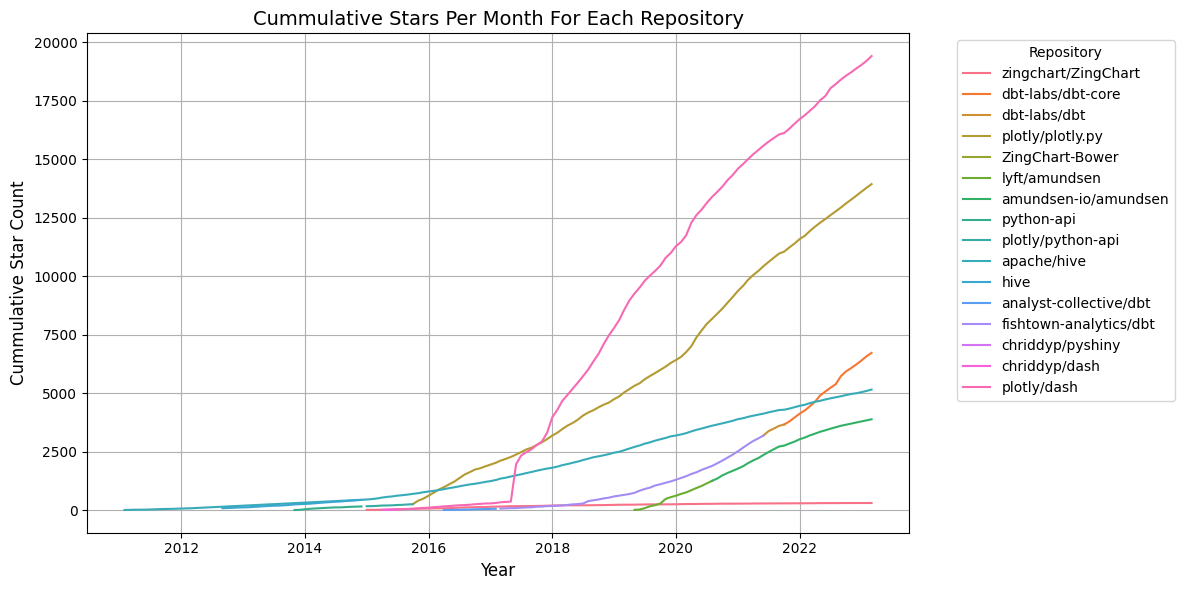

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_monthly_stars['date_month'] = pd.to_datetime(df_monthly_stars['date_month'])

# plot cummulative stars for each repo

plt.figure(figsize=(12,6))
sns.lineplot(
    data = df_monthly_stars,
    x = 'date_month',
    y = 'cumul_star_count',
    hue = 'repo_name',
)
# customize the plot
plt.title('Cummulative Stars Per Month For Each Repository', fontsize = 14)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Cummulative Star Count', fontsize=12)
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

